In [1]:
import pyspark

# 1- Create sPark App

In [2]:
from pyspark.sql import SparkSession

In [5]:
spark = SparkSession.builder.appName('Tp_Spark').getOrCreate()
spark

# 2 - Dataframes

In [17]:
# Q2
df = spark.read.csv('employee_salary_data.csv', header=True, inferSchema=True)
df.show(5)

+--------------+-----------------+----------------+---+------+------+
|          name|      departement|experience_years|age|gender|salary|
+--------------+-----------------+----------------+---+------+------+
| Dustin Bowman|     Data Science|               5| 28|Female|250000|
| Lucas Guillot|          Network|               1| 21|  Male| 50000|
|Alfred Nicolas|Web Developpement|               3| 23|Female|170000|
|Daniel Poulsen|     Data Science|               2| 22|  Male| 25000|
| Enora Laurent|Web Developpement|               1| 17|  Male| 10000|
+--------------+-----------------+----------------+---+------+------+
only showing top 5 rows



In [18]:
# Q3
df.columns

['name', 'departement', 'experience_years', 'age', 'gender', 'salary']

In [16]:
df.printSchema()

root
 |-- name: string (nullable = true)
 |-- departement: string (nullable = true)
 |-- experience_years: string (nullable = true)
 |-- age: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: string (nullable = true)



In [19]:
# Q4
df.describe().show()

+-------+-----------------+-----------------+-----------------+------------------+------+-----------------+
|summary|             name|      departement| experience_years|               age|gender|           salary|
+-------+-----------------+-----------------+-----------------+------------------+------+-----------------+
|  count|               42|               42|               38|                38|    37|               40|
|   mean|             null|             null|9.026315789473685| 35.36842105263158|  null|       1803053.75|
| stddev|             null|             null|7.379617078270803|14.183014303625377|  null|3038440.659103915|
|    min|   Alfred Nicolas|         Big Data|                1|                17|Female|             3000|
|    max|Wiktoria Gronbech|Web Developpement|               27|                62|  Male|         10000000|
+-------+-----------------+-----------------+-----------------+------------------+------+-----------------+



In [24]:
# Q5
df.select('age').show(5)

+---+
|age|
+---+
| 28|
| 21|
| 23|
| 22|
| 17|
+---+
only showing top 5 rows



In [25]:
df.select(['age', 'gender']).show(5)

+---+------+
|age|gender|
+---+------+
| 28|Female|
| 21|  Male|
| 23|Female|
| 22|  Male|
| 17|  Male|
+---+------+
only showing top 5 rows



In [28]:
# Q6
df = df.withColumn('experimented', df['experience_years'] >= 15)
df.show()

+------------------+-----------------+----------------+----+------+-------+------------+
|              name|      departement|experience_years| age|gender| salary|experimented|
+------------------+-----------------+----------------+----+------+-------+------------+
|     Dustin Bowman|     Data Science|               5|  28|Female| 250000|       false|
|     Lucas Guillot|          Network|               1|  21|  Male|  50000|       false|
|    Alfred Nicolas|Web Developpement|               3|  23|Female| 170000|       false|
|    Daniel Poulsen|     Data Science|               2|  22|  Male|  25000|       false|
|     Enora Laurent|Web Developpement|               1|  17|  Male|  10000|       false|
|  Kadir Turkyilmaz|      Mobile Apps|               2|null|  Male|   8000|       false|
|     Jorge Stevens|          Network|              25|  62|  Male|5001000|        true|
|       Vernon Long|         Big Data|              19|  54|Female| 800000|        true|
|Natnael Romundstad| 

In [30]:
# Q7
df = df.drop('experimented')
df.show(5)

+--------------+-----------------+----------------+---+------+------+
|          name|      departement|experience_years|age|gender|salary|
+--------------+-----------------+----------------+---+------+------+
| Dustin Bowman|     Data Science|               5| 28|Female|250000|
| Lucas Guillot|          Network|               1| 21|  Male| 50000|
|Alfred Nicolas|Web Developpement|               3| 23|Female|170000|
|Daniel Poulsen|     Data Science|               2| 22|  Male| 25000|
| Enora Laurent|Web Developpement|               1| 17|  Male| 10000|
+--------------+-----------------+----------------+---+------+------+
only showing top 5 rows



In [32]:
# Q8
df = df.withColumnRenamed('experience_years', 'experience')
df.show(5)

+--------------+-----------------+----------+---+------+------+
|          name|      departement|experience|age|gender|salary|
+--------------+-----------------+----------+---+------+------+
| Dustin Bowman|     Data Science|         5| 28|Female|250000|
| Lucas Guillot|          Network|         1| 21|  Male| 50000|
|Alfred Nicolas|Web Developpement|         3| 23|Female|170000|
|Daniel Poulsen|     Data Science|         2| 22|  Male| 25000|
| Enora Laurent|Web Developpement|         1| 17|  Male| 10000|
+--------------+-----------------+----------+---+------+------+
only showing top 5 rows



# 3 - Missing Values

In [34]:
# Q9 Q10
df.na.drop().show(5)

+--------------+-----------------+----------+---+------+------+
|          name|      departement|experience|age|gender|salary|
+--------------+-----------------+----------+---+------+------+
| Dustin Bowman|     Data Science|         5| 28|Female|250000|
| Lucas Guillot|          Network|         1| 21|  Male| 50000|
|Alfred Nicolas|Web Developpement|         3| 23|Female|170000|
|Daniel Poulsen|     Data Science|         2| 22|  Male| 25000|
| Enora Laurent|Web Developpement|         1| 17|  Male| 10000|
+--------------+-----------------+----------+---+------+------+
only showing top 5 rows



In [42]:
df.show()

+------------------+-----------------+----------+----+------+-------+
|              name|      departement|experience| age|gender| salary|
+------------------+-----------------+----------+----+------+-------+
|     Dustin Bowman|     Data Science|         5|  28|Female| 250000|
|     Lucas Guillot|          Network|         1|  21|  Male|  50000|
|    Alfred Nicolas|Web Developpement|         3|  23|Female| 170000|
|    Daniel Poulsen|     Data Science|         2|  22|  Male|  25000|
|     Enora Laurent|Web Developpement|         1|  17|  Male|  10000|
|  Kadir Turkyilmaz|      Mobile Apps|         2|null|  Male|   8000|
|     Jorge Stevens|          Network|        25|  62|  Male|5001000|
|       Vernon Long|         Big Data|        19|  54|Female| 800000|
|Natnael Romundstad|     Data Science|         2|  21|Female|   9000|
|     Morasaki Bara|Web Developpement|        10|  36|Female|  61500|
|   Marenne Haaksma|Web Developpement|        15|  54|Female| 650000|
|   Kasper Johansen|

In [47]:
df.na.drop(how='any', thresh=5).show()

+------------------+-----------------+----------+----+------+-------+
|              name|      departement|experience| age|gender| salary|
+------------------+-----------------+----------+----+------+-------+
|     Dustin Bowman|     Data Science|         5|  28|Female| 250000|
|     Lucas Guillot|          Network|         1|  21|  Male|  50000|
|    Alfred Nicolas|Web Developpement|         3|  23|Female| 170000|
|    Daniel Poulsen|     Data Science|         2|  22|  Male|  25000|
|     Enora Laurent|Web Developpement|         1|  17|  Male|  10000|
|  Kadir Turkyilmaz|      Mobile Apps|         2|null|  Male|   8000|
|     Jorge Stevens|          Network|        25|  62|  Male|5001000|
|       Vernon Long|         Big Data|        19|  54|Female| 800000|
|Natnael Romundstad|     Data Science|         2|  21|Female|   9000|
|     Morasaki Bara|Web Developpement|        10|  36|Female|  61500|
|   Marenne Haaksma|Web Developpement|        15|  54|Female| 650000|
|   Kasper Johansen|

In [49]:
df.na.drop(how='any', subset=['age']).show()

+------------------+-----------------+----------+---+------+-------+
|              name|      departement|experience|age|gender| salary|
+------------------+-----------------+----------+---+------+-------+
|     Dustin Bowman|     Data Science|         5| 28|Female| 250000|
|     Lucas Guillot|          Network|         1| 21|  Male|  50000|
|    Alfred Nicolas|Web Developpement|         3| 23|Female| 170000|
|    Daniel Poulsen|     Data Science|         2| 22|  Male|  25000|
|     Enora Laurent|Web Developpement|         1| 17|  Male|  10000|
|     Jorge Stevens|          Network|        25| 62|  Male|5001000|
|       Vernon Long|         Big Data|        19| 54|Female| 800000|
|Natnael Romundstad|     Data Science|         2| 21|Female|   9000|
|     Morasaki Bara|Web Developpement|        10| 36|Female|  61500|
|   Marenne Haaksma|Web Developpement|        15| 54|Female| 650000|
|   Kasper Johansen|      Mobile Apps|         4| 26|Female| 250000|
|     Astrid Larsen|Web Developpem

In [50]:
df.describe().show()

+-------+-----------------+-----------------+-----------------+------------------+------+-----------------+
|summary|             name|      departement|       experience|               age|gender|           salary|
+-------+-----------------+-----------------+-----------------+------------------+------+-----------------+
|  count|               42|               42|               38|                38|    37|               40|
|   mean|             null|             null|9.026315789473685| 35.36842105263158|  null|       1803053.75|
| stddev|             null|             null|7.379617078270803|14.183014303625377|  null|3038440.659103915|
|    min|   Alfred Nicolas|         Big Data|                1|                17|Female|             3000|
|    max|Wiktoria Gronbech|Web Developpement|               27|                62|  Male|         10000000|
+-------+-----------------+-----------------+-----------------+------------------+------+-----------------+



In [52]:
# Q11
from pyspark.ml.feature import Imputer

imputer = Imputer(
        inputCols=['age', 'experience', 'salary'],
        outputCols=['age', 'experience', 'salary']
        ).setStrategy('mean')

In [53]:
df = imputer.fit(df).transform(df)
df.show()

+------------------+-----------------+----------+---+------+-------+
|              name|      departement|experience|age|gender| salary|
+------------------+-----------------+----------+---+------+-------+
|     Dustin Bowman|     Data Science|         5| 28|Female| 250000|
|     Lucas Guillot|          Network|         1| 21|  Male|  50000|
|    Alfred Nicolas|Web Developpement|         3| 23|Female| 170000|
|    Daniel Poulsen|     Data Science|         2| 22|  Male|  25000|
|     Enora Laurent|Web Developpement|         1| 17|  Male|  10000|
|  Kadir Turkyilmaz|      Mobile Apps|         2| 35|  Male|   8000|
|     Jorge Stevens|          Network|        25| 62|  Male|5001000|
|       Vernon Long|         Big Data|        19| 54|Female| 800000|
|Natnael Romundstad|     Data Science|         2| 21|Female|   9000|
|     Morasaki Bara|Web Developpement|        10| 36|Female|  61500|
|   Marenne Haaksma|Web Developpement|        15| 54|Female| 650000|
|   Kasper Johansen|      Mobile A

In [54]:
df.describe().show()

+-------+-----------------+-----------------+-----------------+------------------+------+------------------+
|summary|             name|      departement|       experience|               age|gender|            salary|
+-------+-----------------+-----------------+-----------------+------------------+------+------------------+
|  count|               42|               42|               42|                42|    37|                42|
|   mean|             null|             null|9.023809523809524|35.333333333333336|  null|1803053.7142857143|
| stddev|             null|             null|7.010403750378556|  13.4738530290023|  null| 2963405.851697764|
|    min|   Alfred Nicolas|         Big Data|                1|                17|Female|              3000|
|    max|Wiktoria Gronbech|Web Developpement|               27|                62|  Male|          10000000|
+-------+-----------------+-----------------+-----------------+------------------+------+------------------+



# 4 - Filters

In [55]:
# Q12
df.filter(df['salary'] <= 20000).show()

+------------------+-----------------+----------+---+------+------+
|              name|      departement|experience|age|gender|salary|
+------------------+-----------------+----------+---+------+------+
|     Enora Laurent|Web Developpement|         1| 17|  Male| 10000|
|  Kadir Turkyilmaz|      Mobile Apps|         2| 35|  Male|  8000|
|Natnael Romundstad|     Data Science|         2| 21|Female|  9000|
|        Isla Kumar|          Network|         9| 25|  null| 10000|
|        John Elder|Web Developpement|         2| 23|  Male|  7500|
|       Owen Fields|     Data Science|         9| 35|  null|  9000|
|      Melika Alkan|         Big Data|         2| 21|  Male| 15000|
|        Emily Hart|         Big Data|         1| 21|Female|  6000|
|   Magn�lia Barros|      Mobile Apps|         4| 23|Female|  8900|
|       Henry Davis|          Network|         3| 22|Female| 20000|
|       Levi Perrin|Web Developpement|         1| 18|  Male|  3000|
|        Said Heide|     Data Science|         9

In [57]:
df.filter(df['salary'] <= 20000).select(['age', 'experience', 'salary']).show()

+---+----------+------+
|age|experience|salary|
+---+----------+------+
| 17|         1| 10000|
| 35|         2|  8000|
| 21|         2|  9000|
| 25|         9| 10000|
| 23|         2|  7500|
| 35|         9|  9000|
| 21|         2| 15000|
| 21|         1|  6000|
| 23|         4|  8900|
| 22|         3| 20000|
| 18|         1|  3000|
| 35|         9| 14000|
| 21|         2|  6100|
| 35|         6| 11000|
+---+----------+------+



In [58]:
df.filter((df['salary'] <= 20000) & (df['salary'] >= 15000)).show()

+------------+-----------+----------+---+------+------+
|        name|departement|experience|age|gender|salary|
+------------+-----------+----------+---+------+------+
|Melika Alkan|   Big Data|         2| 21|  Male| 15000|
| Henry Davis|    Network|         3| 22|Female| 20000|
+------------+-----------+----------+---+------+------+



In [60]:
df.filter(~(df['salary'] <= 20000)).show(5)

+--------------+-----------------+----------+---+------+-------+
|          name|      departement|experience|age|gender| salary|
+--------------+-----------------+----------+---+------+-------+
| Dustin Bowman|     Data Science|         5| 28|Female| 250000|
| Lucas Guillot|          Network|         1| 21|  Male|  50000|
|Alfred Nicolas|Web Developpement|         3| 23|Female| 170000|
|Daniel Poulsen|     Data Science|         2| 22|  Male|  25000|
| Jorge Stevens|          Network|        25| 62|  Male|5001000|
+--------------+-----------------+----------+---+------+-------+
only showing top 5 rows



# 5 - Grouping By

In [62]:
# Q13
df.groupBy('departement').mean().show()

+-----------------+------------------+------------------+------------------+
|      departement|   avg(experience)|          avg(age)|       avg(salary)|
+-----------------+------------------+------------------+------------------+
|Web Developpement| 8.166666666666666|34.166666666666664|          758175.0|
|      Mobile Apps|               8.0|34.166666666666664|         3735325.0|
|         Big Data|11.333333333333334|39.833333333333336|3134666.6666666665|
|          Network|             9.125|            32.875|        912519.125|
|     Data Science|               9.2|              36.7|         1811005.3|
+-----------------+------------------+------------------+------------------+



In [66]:
df.groupBy('departement').sum().show()

+-----------------+---------------+--------+-----------+
|      departement|sum(experience)|sum(age)|sum(salary)|
+-----------------+---------------+--------+-----------+
|Web Developpement|             98|     410|    9098100|
|      Mobile Apps|             48|     205|   22411950|
|         Big Data|             68|     239|   18808000|
|          Network|             73|     263|    7300153|
|     Data Science|             92|     367|   18110053|
+-----------------+---------------+--------+-----------+



In [68]:
# Q14
df.groupBy('gender').max().show()

+------+---------------+--------+-----------+
|gender|max(experience)|max(age)|max(salary)|
+------+---------------+--------+-----------+
|  null|             13|      42|    1803053|
|Female|             27|      62|   10000000|
|  Male|             25|      62|    7600000|
+------+---------------+--------+-----------+



# 6 - Plotting with spark

In [69]:
type(df)

pyspark.sql.dataframe.DataFrame

In [71]:
# Q15
pd_df = df.toPandas()
pd_df.head()

,name,departement,experience,age,gender,salary
0,Dustin Bowman,Data Science,5,28,Female,250000
1,Lucas Guillot,Network,1,21,Male,50000
2,Alfred Nicolas,Web Developpement,3,23,Female,170000
3,Daniel Poulsen,Data Science,2,22,Male,25000
4,Enora Laurent,Web Developpement,1,17,Male,10000


In [72]:
type(pd_df)

pandas.core.frame.DataFrame

<AxesSubplot:xlabel='experience', ylabel='age'>

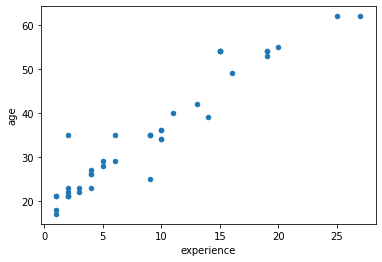

In [77]:
pd_df.plot.scatter(x='experience', y='age')

In [78]:
# Q16
departement_df = pd_df.groupby('departement').count()
departement_df

,name,experience,age,gender,salary
departement,,,,,
Big Data,6,6,6,6,6
Data Science,10,10,10,8,10
Mobile Apps,6,6,6,6,6
Network,8,8,8,6,8
Web Developpement,12,12,12,11,12


<AxesSubplot:ylabel='departement'>

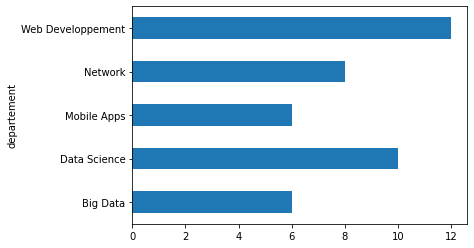

In [80]:
departement_df['name'].plot.barh()

# 7 - Spark Mlib 

In [93]:
training = df
training.show()

+------------------+-----------------+----------+---+------+-------+
|              name|      departement|experience|age|gender| salary|
+------------------+-----------------+----------+---+------+-------+
|     Dustin Bowman|     Data Science|         5| 28|Female| 250000|
|     Lucas Guillot|          Network|         1| 21|  Male|  50000|
|    Alfred Nicolas|Web Developpement|         3| 23|Female| 170000|
|    Daniel Poulsen|     Data Science|         2| 22|  Male|  25000|
|     Enora Laurent|Web Developpement|         1| 17|  Male|  10000|
|  Kadir Turkyilmaz|      Mobile Apps|         2| 35|  Male|   8000|
|     Jorge Stevens|          Network|        25| 62|  Male|5001000|
|       Vernon Long|         Big Data|        19| 54|Female| 800000|
|Natnael Romundstad|     Data Science|         2| 21|Female|   9000|
|     Morasaki Bara|Web Developpement|        10| 36|Female|  61500|
|   Marenne Haaksma|Web Developpement|        15| 54|Female| 650000|
|   Kasper Johansen|      Mobile A

In [94]:
# Q2
from pyspark.ml.feature import VectorAssembler
featrueassembler = VectorAssembler(
                    inputCols=['age', 'experience'],
                    outputCol='Features')

In [95]:
output = featrueassembler.transform(training)

In [96]:
output.show()

+------------------+-----------------+----------+---+------+-------+-----------+
|              name|      departement|experience|age|gender| salary|   Features|
+------------------+-----------------+----------+---+------+-------+-----------+
|     Dustin Bowman|     Data Science|         5| 28|Female| 250000| [28.0,5.0]|
|     Lucas Guillot|          Network|         1| 21|  Male|  50000| [21.0,1.0]|
|    Alfred Nicolas|Web Developpement|         3| 23|Female| 170000| [23.0,3.0]|
|    Daniel Poulsen|     Data Science|         2| 22|  Male|  25000| [22.0,2.0]|
|     Enora Laurent|Web Developpement|         1| 17|  Male|  10000| [17.0,1.0]|
|  Kadir Turkyilmaz|      Mobile Apps|         2| 35|  Male|   8000| [35.0,2.0]|
|     Jorge Stevens|          Network|        25| 62|  Male|5001000|[62.0,25.0]|
|       Vernon Long|         Big Data|        19| 54|Female| 800000|[54.0,19.0]|
|Natnael Romundstad|     Data Science|         2| 21|Female|   9000| [21.0,2.0]|
|     Morasaki Bara|Web Deve

In [98]:
finalized_data = output.select('Features', 'salary')
finalized_data.show()

+-----------+-------+
|   Features| salary|
+-----------+-------+
| [28.0,5.0]| 250000|
| [21.0,1.0]|  50000|
| [23.0,3.0]| 170000|
| [22.0,2.0]|  25000|
| [17.0,1.0]|  10000|
| [35.0,2.0]|   8000|
|[62.0,25.0]|5001000|
|[54.0,19.0]| 800000|
| [21.0,2.0]|   9000|
|[36.0,10.0]|  61500|
|[54.0,15.0]| 650000|
| [26.0,4.0]| 250000|
| [29.0,6.0]|1400000|
| [25.0,9.0]|  10000|
|[39.0,14.0]|6000050|
|[40.0,11.0]| 220100|
| [23.0,2.0]|   7500|
| [35.0,9.0]|   9000|
| [27.0,4.0]|  87000|
|[34.0,10.0]| 930000|
+-----------+-------+
only showing top 20 rows



In [99]:
# Q3 Q4

from pyspark.ml.regression import LinearRegression

In [100]:
train_data, test_data = finalized_data.randomSplit([0.75, 0.25])

In [101]:
LR = LinearRegression(featuresCol='Features', labelCol='salary')
regressor = LR.fit(train_data)

In [102]:
# Q5
regressor.coefficients

DenseVector([24764.1077, 204686.5484])

In [103]:
regressor.intercept

-1133558.5312125394

In [104]:
# Q6
pred_results = regressor.evaluate(test_data)

In [105]:
pred_results.predictions.show()

+-----------+-------+------------------+
|   Features| salary|        prediction|
+-----------+-------+------------------+
| [21.0,2.0]|   9000|-204139.1723268798|
| [22.0,3.0]|  20000|25311.483799230307|
| [26.0,4.0]|  25000| 329054.4630779885|
| [26.0,4.0]| 250000| 329054.4630779885|
| [35.0,9.0]|1803053|1575364.1745787365|
|[49.0,16.0]|7600000|3354867.5214843526|
|[53.0,19.0]|9300000|4067983.5975802327|
|[62.0,25.0]|5001000| 5518979.857489541|
+-----------+-------+------------------+



In [106]:
pred_results.r2

0.5438064005767862